## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

### You Try - 3 Warm-Up Problems From Lecture

## You Try

Write a python **function** that takes as an input a birth date and outputs how old the person is in just years, by using the datetime functionality.



In [3]:
from datetime import datetime

def calculate_age(birth_date_str):
    """
    Takes a birth date string in 'YYYY-MM-DD' format
    and returns the age in whole years.
    """
    # Converting the string into a datetime object
    birth_date = datetime.strptime(birth_date_str, "%Y-%m-%d")
    
    # Get today's date
    today = datetime.today()
    
    # Calculate age
    age = today.year - birth_date.year
    
    # Adjust if birthday hasn't occurred yet this year
    if (today.month, today.day) < (birth_date.month, birth_date.day):
        age -= 1
        
    return age

# Example usage:
print(calculate_age("2000-10-15"))


25


In [9]:
# Your code here


## You try

Use the methods from lecture Timestamp, Period, and groupby() to find the maximum and minimum temperatures for each year in our weather data. Plot both the max and min temperatures together on a line graph with the years on the x-axis.

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parthdande/timeseries-weather-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))
df = pd.read_csv(path+'/'+'Weather_Data_1980_2024(hourly).csv')
df.head(5)

C:\Users\ambsc\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



100%|█████████████████████████████████████████████████████████████████████████████| 11.4M/11.4M [00:02<00:00, 4.82MB/s]

Extracting files...


Path to dataset files: C:\Users\ambsc\.cache\kagglehub\datasets\parthdande\timeseries-weather-dataset\versions\2
['Weather_dataset.csv', 'Weather_Data_1980_2024(hourly).csv']


,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day
0,1980-01-01T00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0
1,1980-01-01T01:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0
2,1980-01-01T02:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1
3,1980-01-01T03:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1
4,1980-01-01T04:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1


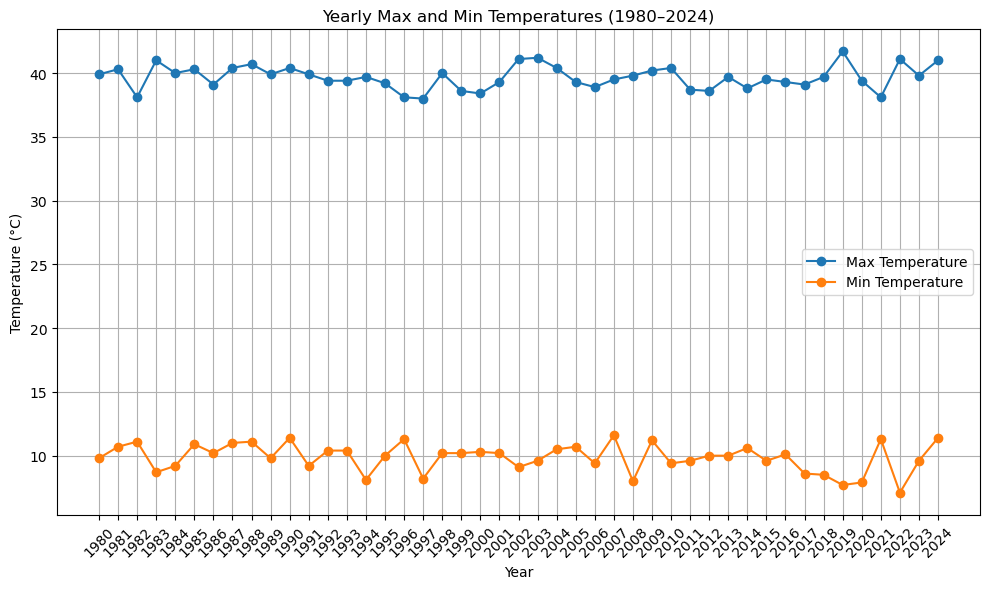

In [7]:
# Convert the 'time' column to pandas datetime
df['time'] = pd.to_datetime(df['time'])

# Create a Period column for the year
df['year'] = df['time'].dt.to_period('Y')

# Group by year and calculate max/min temperature
yearly_temps = df.groupby('year')['temperature'].agg(['max', 'min']).reset_index()

# Convert 'year' to string for plotting
yearly_temps['year'] = yearly_temps['year'].astype(str)

# Plot both max and min temperatures
plt.figure(figsize=(10,6))
plt.plot(yearly_temps['year'], yearly_temps['max'], label='Max Temperature', marker='o')
plt.plot(yearly_temps['year'], yearly_temps['min'], label='Min Temperature', marker='o')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Yearly Max and Min Temperatures (1980–2024)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## You Try

Add the other two stocks to the correlation graph from the lecture notes. Make sure to label the graph clearly and make it look nice! Experiment with different values for your moving average window. What happens when you change this and why?



In [8]:
file = 'data/stock_px.csv'
df_stocks = pd.read_csv(file,parse_dates=True,index_col=0)
df_resample = df_stocks.resample('B').ffill()
# Get the percent changes
pcng_spx = df_resample['SPX'].pct_change()
pcng_aapl = df_resample['AAPL'].pct_change()


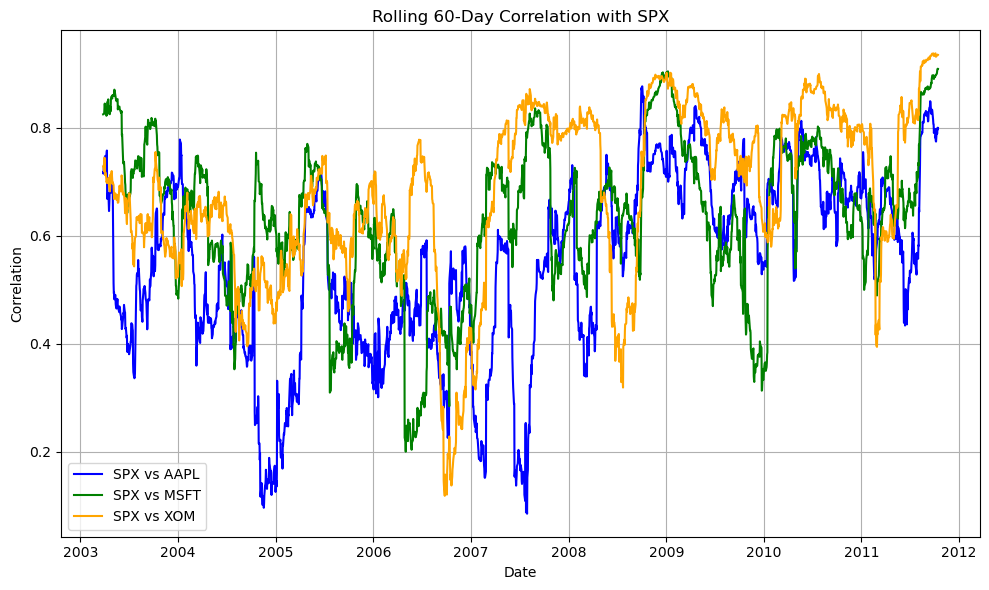

In [11]:
# Add the other two stocks
pcng_msft = df_resample['MSFT'].pct_change()
pcng_xom  = df_resample['XOM'].pct_change()

# Choose a rolling window
window = 60

# Calculate rolling correlations
corr_aapl = pcng_spx.rolling(window).corr(pcng_aapl)
corr_msft = pcng_spx.rolling(window).corr(pcng_msft)
corr_xom  = pcng_spx.rolling(window).corr(pcng_xom)

# Plot all correlations
plt.figure(figsize=(10,6))
plt.plot(corr_aapl, label='SPX vs AAPL', color='blue')
plt.plot(corr_msft, label='SPX vs MSFT', color='green')
plt.plot(corr_xom,  label='SPX vs XOM',  color='orange')

plt.title(f'Rolling {window}-Day Correlation with SPX')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---------------
## Time Series Data - Day9 HW

**Idea from DATAQUEST** 
- Author = Jennifer Walker
- Environmental scientist / data geek / Python evangelist.

Open Power System Data (OPSD) for Germany:

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh

Below I have added some prompts to lead you through the timeseries analysis.


Your final notebooks should:

- [ ] Be a completely new notebook with just the Day9 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

**Remember to Proof Read and Proof Run your code** Restart the kernel and go through it all once before submitting.

In [12]:
df = pd.read_csv('data/opsd_germany_daily.csv', parse_dates = True, index_col=0)
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


## Data Basics and Preparation

Here you get some basic familiarity with the data:

- run stats on each of the variables
- count nans in each column
- look at the data types
- double check that you understand the variables and their units
- what is the date range and frequency
- add columns to the data set: Year, Month, and Weekday Name

## Data Exploration - Basic Visualization

Start to make plots and see if you can generate some questions about the data. Make sure that you make observations about each plot - say what you see and what it means in terms of the data.

- Plot the overall consumption over time.
- Plot the wind and solar consumption over time.

- Choose a focal year and redo the plots to look at variability over the year.
- Redo this for a focal month

## Further Exploration

Now continue exploring the data to see what you can find out. Remember to explain what you are learning from each graph or calculation. Add guiding words in markdown to talk about what your code should be doing and why.

- How does seasonality effect the energy consumption? Consider the consumption grouped on a monthly basis. You could look at max, min, mean, etc. Make an interesting plot of this data (bar plot, box plot, etc). What do you learn?

- How does the day of the week change energy consumption?

- Using downsampling, plot on the same graph the daily (original data) and the average weekly (downsampled data) consumption for both solar and wind.

- Using downsampling plot the yearly rolling average of both wind and solar consumption.

- See if you can come up with a really cool graph of your own!

## Conclusion